# Assignment 8 Neural Networks

Author: Matthew Johnescu

# Table of Contents:
- [Assignment Questions](#assignment-questions)
- [Importing Packages](#importing-packages)
- [Importing Dataset](#importing-dataset)
- [Distribution of Target Variable](#distribution-of-target-variable)
- [Prepping Data](#prepping-data)
- [Neural Network](#neural-network)
- [Model Results](#model-results)

# Assignment Questions

**Perspective:**

I am conducting this analysis as a Data Scientist working for a retail company that specializes in electronic sales. 
The goal of the analysis is to predict the total price of electronic items based on various features, using a neural network model.

**Dataset Description:**

The dataset used for this analysis contains electronic sales data from September 2023 to September 2024. It includes variables like 'Product Type', 'Quantity', 'Unit Price', etc. 
The dataset was sourced from Kaggle, and the file URL is: (https://www.kaggle.com/datasets/cameronseamons/electronic-sales-sep2023-sep2024)

**Independent and Dependent Variables:**

The dependent variable for this analysis is 'Total Price', which is numeric. The independent variables include 'Quantity', 'Unit Price', 'Product Type', 'Add-ons Purchased', among others.

The dataset contains a mix of categorical, binary, and numeric variables. Categorical variables were encoded using one-hot encoding, and numeric variables were standardized for the neural network.

**Suitability of Variables for Analysis:**

The variables used in this analysis are suitable as they provide a diverse set of features that could potentially influence the total price of electronic items, allowing the neural network to learn patterns effectively.

**Conclusions:**

The model was trained over 60 epochs, and the performance improved significantly with each epoch, indicating effective learning. By the end of training, the model achieved a final Mean Absolute Error (MAE) of 149.69 and a Root Mean Squared Error (RMSE) of 212.05 on the test set. The R² score of 0.993 indicates that the model explained 99.3% of the variance in the total price, suggesting strong predictive power. 

The scatter plot of Actual vs Predicted Total Price further demonstrates the model's performance, showing that the predicted values align closely with the actual values, with most points lying along the line of perfect prediction. This indicates that the model was able to capture the relationships between the features and the target variable effectively.

The distribution plot of 'Total Price' reveals that the data is right-skewed, with a higher frequency of lower-priced items. This characteristic is important as it affects model training, potentially making it easier for the model to predict lower values accurately while struggling slightly with higher values. However, the scatter plot suggests that the model handled this skewness well.

The pairplot provided insights into relationships between various features. For example, 'Quantity' showed a positive correlation with 'Total Price', which makes intuitive sense as higher quantities typically lead to higher overall prices. Understanding these relationships helped in ensuring the selected features were suitable for predicting the target variable.

**Notebook Visuals:**
1. The pairplot shows relationships between key features, such as a positive correlation between 'Quantity' and 'Total Price'.
2. The distribution plot shows the right-skewed nature of the 'Total Price' variable, with a higher frequency of lower values.
3. The scatter plot of Actual vs Predicted Total Price shows that the model predictions align well with the actual values, indicating strong model performance.

**Model Metrics and Interpretation:**

- **Mean Absolute Error (MAE)**: The MAE of 149.69 indicates that, on average, the model's predictions are off by about 149.69 units of currency. This is a reasonable level of error given the range of 'Total Price' values in the dataset.
- **Mean Squared Error (MSE)**: The MSE of 44,965.70 suggests that the average squared difference between the predicted and actual values is relatively low, indicating that large errors are infrequent.
- **Root Mean Squared Error (RMSE)**: The RMSE of 212.05 provides a measure of the average magnitude of error in the same units as the target variable, which is useful for interpretation. The relatively low RMSE compared to the range of 'Total Price' values indicates that the model is performing well.
- **R² Score**: The R² score of 0.993 is very close to 1, which means that 99.3% of the variance in 'Total Price' can be explained by the model. This is a strong indication of the model's ability to generalize well to unseen data.

**Assumptions and Limitations:**

1. The dataset is assumed to be clean and accurately represent the sales data for the specified time period. Any inconsistencies or errors in the data could affect model performance. The dataset is synthetic.
2. The model used is a simple feed-forward neural network, which may have limitations compared to more sophisticated architectures. More complex models such as convolutional neural networks (CNNs) or recurrent neural networks (RNNs) could potentially yield better performance, especially if additional temporal or spatial data were available.
3. Robustness checks included splitting the dataset into training and testing sets, evaluating metrics such as MAE, RMSE, and R², and monitoring performance on a validation set during training. Early stopping was also considered to prevent overfitting. Further robustness checks, such as k-fold cross-validation and hyperparameter tuning, could be employed to ensure the model's stability and reliability.

**Future Work:**

Further steps could involve experimenting with more complex architectures, such as convolutional neural networks (CNNs) or ensemble methods, to compare performance. Feature engineering could also improve the model's predictive power by creating interaction terms or more sophisticated encodings for categorical variables. Additionally, implementing regularization techniques or tuning hyperparameters could help in enhancing model performance and preventing overfitting. Finally, testing the model on new datasets or in a production environment would be crucial to validate its real-world applicability and generalizability.

# Importing Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
# Add File Path of the CSV file here
# file_path = "C:/Users/johne/Downloads/Electronic_sales_Sep2023-Sep2024.csv"
file_path = "C:/Users/matt/Downloads/archive (2)/Electronic_sales_Sep2023-Sep2024.csv"
# Reading the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

In [3]:
# Check for missing data in the dataset
missing_data = df.isnull().sum()
print(missing_data)

# Display basic statistics for the dataset
basic_statistics = df.describe()
print(basic_statistics)

Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64
        Customer ID           Age        Rating   Total Price    Unit Price  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean   10483.526550     48.994100      3.093950   3180.133419    578.631867   
std     5631.732525     18.038745      1.223764   2544.978675    312.274076   
min     1000.000000     18.000000      1.000000     20.750000     20.750000   
25%     5478.000000     33.000000      2.000000   1139.680000    361.180000   
50%    10499.500000     49.000000      3.000000   2534.490000    463.960000   
75%    15504.00000

# Distribution of Target Variable

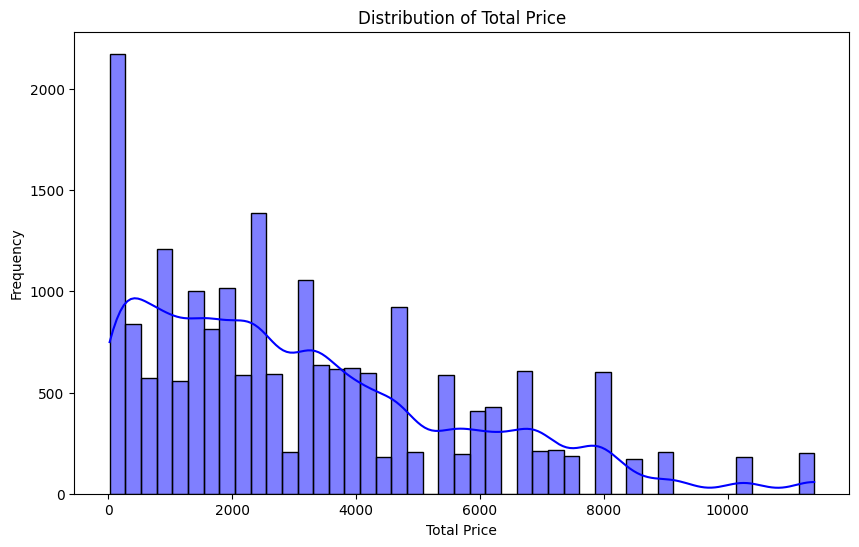

In [4]:
# Visualizing the distribution of 'Total Price'
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Price'], kde=True, color='blue')
plt.title('Distribution of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()


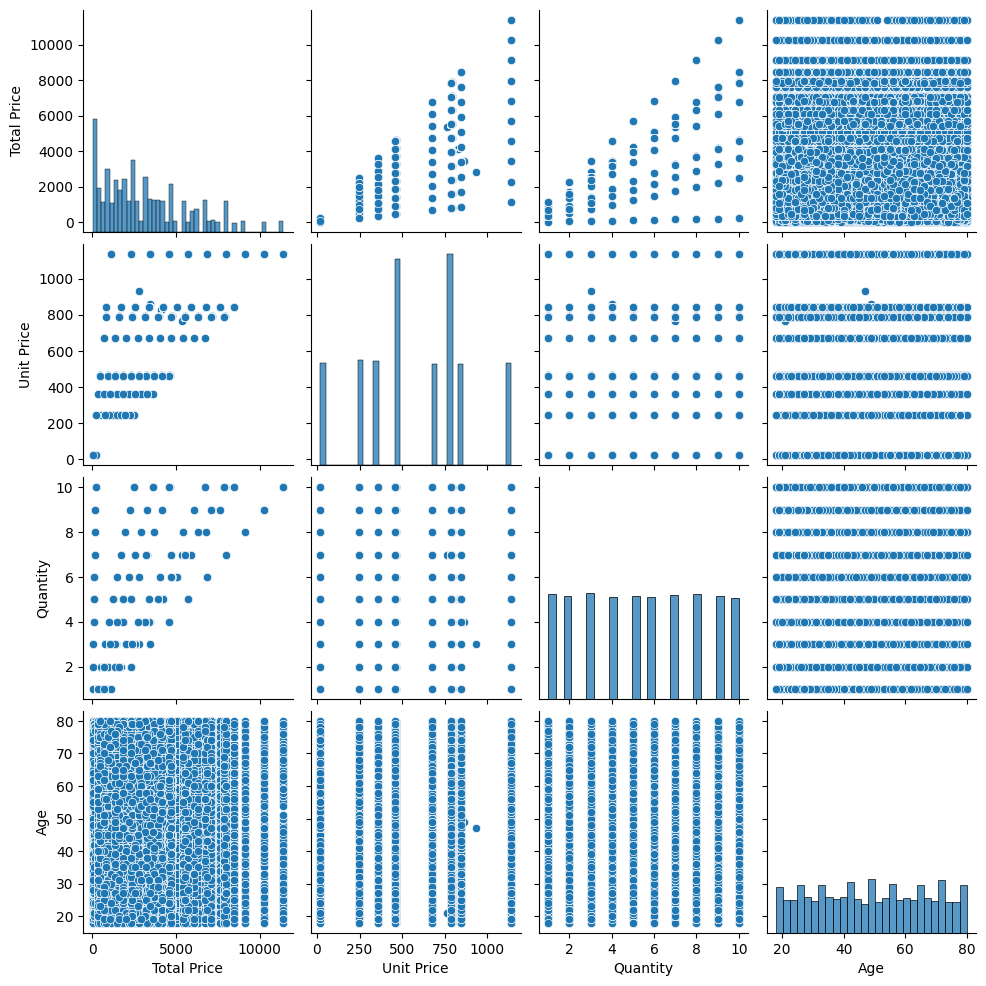

In [5]:
# Pairplot of selected features to understand relationships
selected_features = ['Total Price', 'Unit Price', 'Quantity', 'Add-ons Purchased', 'Age']
sns.pairplot(df[selected_features])
plt.show()

# Prepping Data

In [6]:
# Data Preprocessing
# Handling missing values (if any)
df['Add-ons Purchased'].fillna(0, inplace=True)

# Encoding categorical variables (one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

# Defining Independent and Dependent Variables
# Assuming 'Total Price' is the target variable (dependent variable)
X = df.drop(['Total Price'], axis=1)  # Independent variables
y = df['Total Price']  # Dependent variable

# Splitting the dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Neural Network

In [7]:
# Building the Neural Network
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Training the Neural Network
model.fit(X_train, y_train, epochs=60, batch_size=10, validation_split=0.2)

# Evaluate the model
eval_results = model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test MAE: {eval_results[1]}")

# Predictions
y_pred = model.predict(X_test)

# Save the results in a DataFrame
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

Epoch 1/60
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - loss: 15137766.0000 - mean_absolute_error: 2970.4282 - val_loss: 4786093.0000 - val_mean_absolute_error: 1624.8914
Epoch 2/60
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - loss: 3554762.7500 - mean_absolute_error: 1410.1429 - val_loss: 2827835.5000 - val_mean_absolute_error: 1206.1447
Epoch 3/60
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - loss: 2061882.5000 - mean_absolute_error: 1021.2184 - val_loss: 1713270.7500 - val_mean_absolute_error: 880.6726
Epoch 4/60
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - loss: 1282401.1250 - mean_absolute_error: 746.0424 - val_loss: 1097931.1250 - val_mean_absolute_error: 664.6802
Epoch 5/60
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - loss: 822851.4375 - mean_absolute_error: 580.5763 - val_loss: 788569.6250 - val_mean_absolute_error: 553.0334
Epoch 6/60
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step - loss: 636491.7500 - mean_absolute_error: 503.8400 - val_loss: 628881.6250 - val_mean_abs

# Model Results

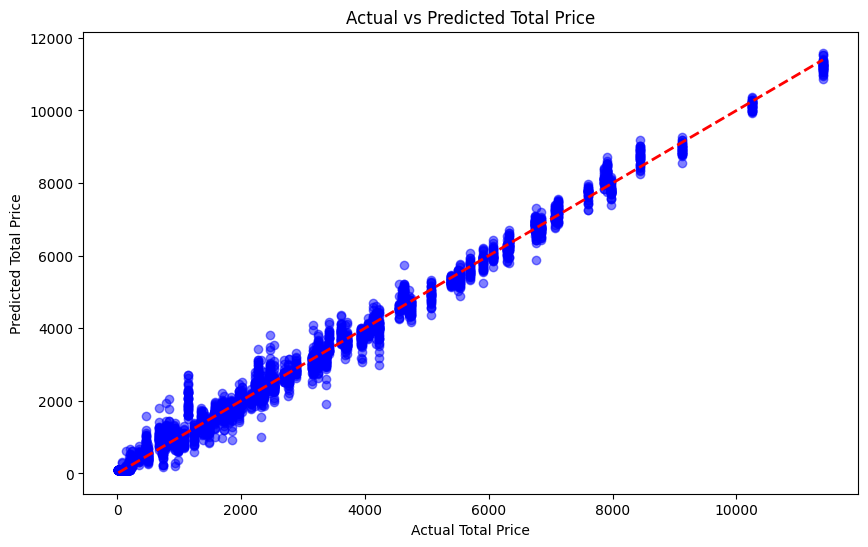

Mean Absolute Error (MAE): 174.94508241004945
Mean Squared Error (MSE): 61366.5530657339
Root Mean Squared Error (RMSE): 247.72273425290197
R^2 Score: 0.9905016689711639


In [8]:
# Visualize and Examine Model Accuracy
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Total Price')
plt.ylabel('Predicted Total Price')
plt.title('Actual vs Predicted Total Price')
plt.show()

# Calculating and printing additional accuracy metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")